# Cosmetics Market Research & Industry Analysis - India

### BASED ON UNIQUE SELLING PROPOSITION OF BRANDS

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 


In [3]:
data_df = pd.read_csv("indiacosmetics_data_updated.csv")
# take a look at the dataset
df=data_df.dropna()
df.rename(columns={'Revenue in USD':'Revenue'},inplace=True)
df


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Positioning,Brand,Origin,Products,Store,Revenue
0,Luxury,Estee Lauder,New York,Skin care,"Mumbai, Gurgaon, New Delhi",11.26000
1,Luxury,Elizabeth Arden,America,Skin care,Mumbai,0.96600
2,Luxury,Chanel,"Paris, France",Skin care,New Delhi,7.30000
3,Premium,Clinique,New York,Skin care,Mumbai,11.26000
4,Premium,Clarins,France,Skin care,Exclusive malls,2.00000
5,Premium,SmashBox,"Culver city,California",Makeup and color cosmetics,Available at Cosmetics E-commerce portal,11.26000
6,Premium,Faces Canada,Canada,Makeup and color cosmetics,Mumbai,0.01000
7,Premium,Mac,"Toronto, Canada",Makeup and color cosmetics,"Easy to use Metro, next top 11 cities",11.26000
8,Premium,Olay,United States,Skin care,PAN India,2.50000
9,Premium,The Body Shop,London,Skin care,Exclusive Malls,0.36000


### POSITIONING

In [4]:
cdf=df[['Positioning','Brand','Products','Revenue']]
cdf

,Positioning,Brand,Products,Revenue
0,Luxury,Estee Lauder,Skin care,11.26000
1,Luxury,Elizabeth Arden,Skin care,0.96600
2,Luxury,Chanel,Skin care,7.30000
3,Premium,Clinique,Skin care,11.26000
4,Premium,Clarins,Skin care,2.00000
5,Premium,SmashBox,Makeup and color cosmetics,11.26000
6,Premium,Faces Canada,Makeup and color cosmetics,0.01000
7,Premium,Mac,Makeup and color cosmetics,11.26000
8,Premium,Olay,Skin care,2.50000
9,Premium,The Body Shop,Skin care,0.36000


In [5]:
cdf.dtypes

Positioning     object
Brand           object
Products        object
Revenue        float64
dtype: object

In [6]:
cdf['Positioning'].replace(to_replace=['Luxury','Premium','Mass'], value=[0,1,2],inplace=True)
cdf.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Positioning,Brand,Products,Revenue
0,0,Estee Lauder,Skin care,11.260
1,0,Elizabeth Arden,Skin care,0.966
2,0,Chanel,Skin care,7.300
3,1,Clinique,Skin care,11.260
4,1,Clarins,Skin care,2.000


In [7]:
y_full= pd.concat([cdf,pd.get_dummies(cdf['Products'])],axis=1)
y_full.drop(['Products'],axis=1, inplace=True)
y_full.head()

,Positioning,Brand,Revenue,Fragrances,Hair care,Makeup and color cosmetics,Skin care
0,0,Estee Lauder,11.260,0,0,0,1
1,0,Elizabeth Arden,0.966,0,0,0,1
2,0,Chanel,7.300,0,0,0,1
3,1,Clinique,11.260,0,0,0,1
4,1,Clarins,2.000,0,0,0,1


In [8]:
grouped = y_full.groupby('Brand').mean().reset_index()
grouped.head()

,Brand,Positioning,Revenue,Fragrances,Hair care,Makeup and color cosmetics,Skin care
0,Amway,2,8.80,0,0,0,1
1,Avon,1,5.70,0,0,0,1
2,Bourjois,1,4.34,0,0,1,0
3,Chanel,0,7.30,0,0,0,1
4,Clarins,1,2.00,0,0,0,1


In [9]:
reg_df=cdf
reg_df['Products'].replace(to_replace=['Fragrances','Hair care','Makeup and color cosmetics','Skin care'], value=[0,1,2,3],inplace=True)
reg_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Positioning,Brand,Products,Revenue
0,0,Estee Lauder,3,11.260
1,0,Elizabeth Arden,3,0.966
2,0,Chanel,3,7.300
3,1,Clinique,3,11.260
4,1,Clarins,3,2.000


# Heat Map

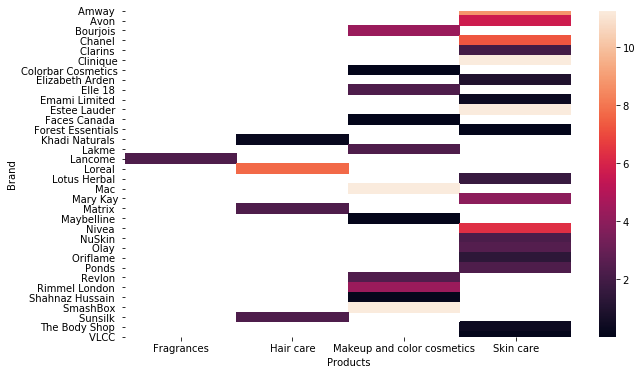

In [10]:
import seaborn as sns
cdf1 = df.pivot( "Brand", "Products","Revenue")
plt.figure(figsize = (10,6))
ax = sns.heatmap(cdf1, xticklabels=True, yticklabels=True,cbar=True)


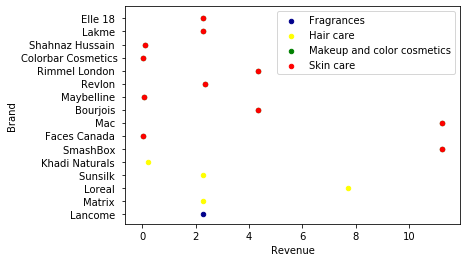

In [11]:
ax = reg_df[reg_df['Products'] == 0][0:50].plot(kind='scatter', x='Revenue', y='Brand', color='DarkBlue', label='Fragrances');
reg_df[reg_df['Products'] == 1][0:50].plot(kind='scatter', x='Revenue', y='Brand', color='Yellow', label='Hair care', ax=ax);
reg_df[reg_df['Products'] == 2][0:50].plot(kind='scatter', x='Revenue', y='Brand', color='Green', label='Makeup and color cosmetics', ax=ax);
reg_df[reg_df['Products'] == 2][0:50].plot(kind='scatter', x='Revenue', y='Brand', color='red', label='Skin care', ax=ax);

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12903e26d8>,
      dtype=object)

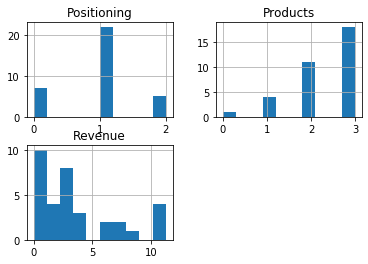

In [12]:
cdf.hist()

In [13]:
mkt=pd.read_csv('categorymarketleader.csv')
mkt.head()

,Category,Market Leader,Revenue
0,Hair-Care,Marico,6.84
1,Fragrance,Vini cosmetics,1.07
2,Skin care,HUL,3.72
3,Makeup and color cosmetics,HUL,0.36


# TOP MARKET LEADERS

<Figure size 720x3600 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


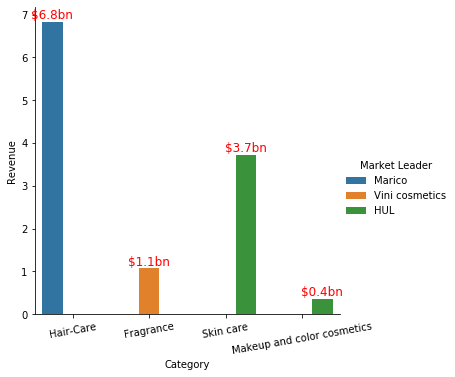

In [14]:
plt.figure(figsize=(10,50))
ax=sns.catplot(x="Category", y="Revenue", hue="Market Leader", kind="bar", aspect=1,data=mkt);
# Get current axis on current figure
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '$%.1fbn' % p.get_height(), 
            fontsize=12, color='red', ha='center', va='bottom')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10)

plt.show()


# CHANNEL SPLIT IN ORGANISED SECTOR

In [15]:
chnl=pd.read_csv('channelwise.csv')
chnl.head()

,Channel split,channel split in organised sector,Growth
0,Organised,direct selling,5
1,Organised,LFS,6
2,Organised,brand outlet,12
3,Organised,salon,2
4,Unorganised,NaN,69


<Figure size 720x3600 with 0 Axes>

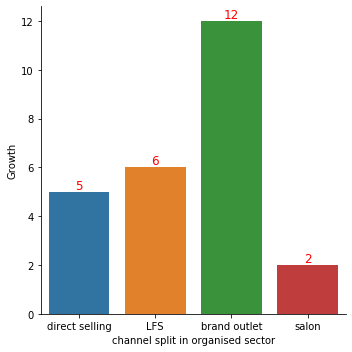

In [35]:
plt.figure(figsize=(10,50))
ax=sns.catplot(x="channel split in organised sector", y="Growth",  kind="bar", aspect=1,data=chnl);
# Get current axis on current figure
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.f'% p.get_height(), 
            fontsize=12, color='red', ha='center', va='bottom')
ax.set_xticklabels(ax.get_xticklabels())

plt.show()


# CHANNEL SPLIT

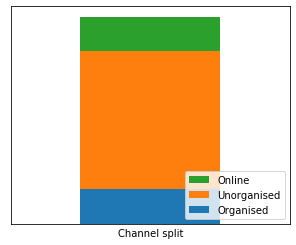

In [17]:
  import matplotlib.pyplot as plt

# create dummy variable them group by that
# set the legend to false because we'll fix it later
chnl.assign(dummy = 1).groupby(['dummy','Channel split']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False,figsize = (5,4))
# other it'll show up as 'dummy' 
plt.xlabel('Channel split')
# disable ticks in the x axis
plt.xticks([])
plt.yticks([])
# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
labels = reversed(chnl['Channel split'].unique())
plt.legend(reversed_handles,labels,loc='lower right')

plt.show()

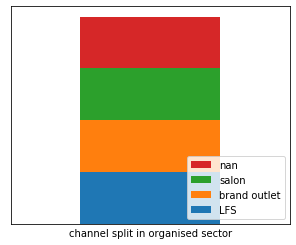

In [18]:
  import matplotlib.pyplot as plt

# create dummy variable them group by that
# set the legend to false because we'll fix it later
chnl.assign(dummy = 1).groupby(['dummy','channel split in organised sector']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False,figsize = (5,4))
# other it'll show up as 'dummy' 
plt.xlabel('channel split in organised sector')
# disable ticks in the x axis
plt.xticks([])
plt.yticks([])
# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
labels = reversed(chnl['channel split in organised sector'].unique())
plt.legend(reversed_handles,labels,loc='lower right')

plt.show()

# POSITIONING BASED ON REVENUE AND CATEGORY

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f128e1c8438>,
      dtype=object)

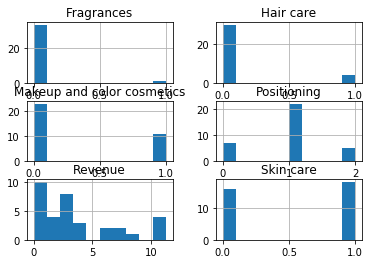

In [19]:
y_full.hist()

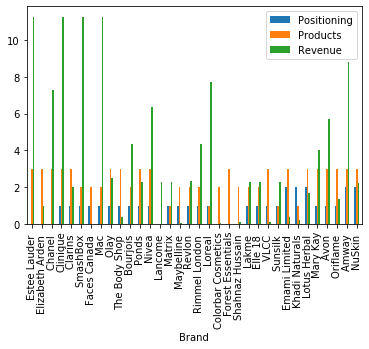

In [20]:

ax = reg_df.plot.bar(rot=90,x='Brand')

In [21]:
cos=pd.read_csv("Cosmetic by age group.csv")
cos.head()

,Category,Baby Boomers,Gen Xers,Millennials,Gen Zers
0,Browse online; buy online,16.0,14,22.0,20.0
1,Browse in store; buy online,3.0,10,7.0,8.0
2,Browse in store & online; buy online,2.0,3,11.0,11.0
3,Browse in store & online; buy store,8.0,12,15.0,16.0
4,Browse online; buy in store,8.0,6,20.0,15.0


In [22]:
fn=cos.groupby("Category").sum()
fn

,Baby Boomers,Gen Xers,Millennials,Gen Zers
Category,,,,
Browse in store & online; buy online,2.0,3,11.0,11.0
Browse in store & online; buy store,8.0,12,15.0,16.0
Browse in store; buy in store,63.0,52,25.0,30.0
Browse in store; buy online,3.0,10,7.0,8.0
Browse online; buy in store,8.0,6,20.0,15.0
Browse online; buy online,16.0,14,22.0,20.0
others,0.0,3,0.0,0.0


# HEAT MAP - RETAIL STORE INFLUENCE

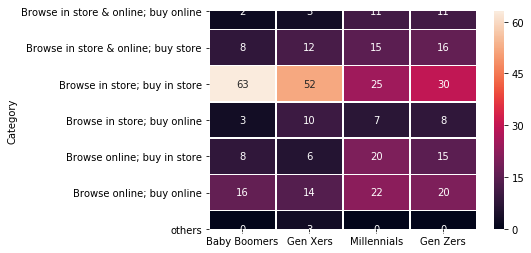

In [23]:
ax = sns.heatmap(f,linewidths=.5,annot=True)
plt.show()

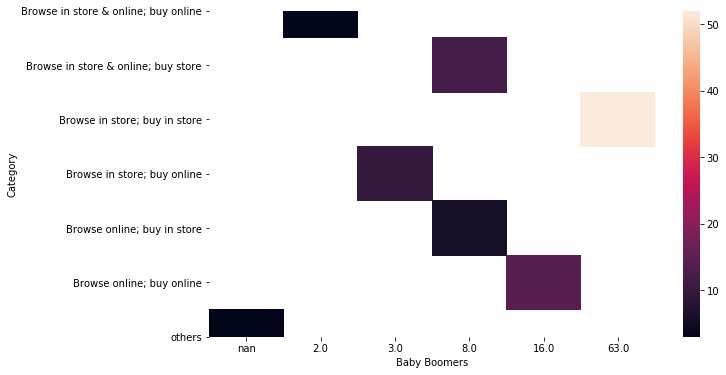

In [24]:
import seaborn as sns
cdf1 = cos.pivot( "Category", "Baby Boomers","Gen Xers")
plt.figure(figsize = (10,6))
ax = sns.heatmap(cdf1, xticklabels=True, yticklabels=True,cbar=True)


#### THANK YOU